In [3]:
import ipysheet
sheet = ipysheet.sheet()
sheet

Sheet(columns=5, layout=Layout(height='auto', width='auto'), rows=5)

In [4]:
sheet = ipysheet.sheet(rows=3, columns=4)
cell1 = ipysheet.cell(0, 0, 'Hello')
cell2 = ipysheet.cell(2, 0, 'World')
cell_value = ipysheet.cell(2,2, 42.)
sheet

Sheet(cells=(Cell(column_end=0, column_start=0, row_end=0, row_start=0, type='text', value='Hello'), Cell(colu…

In [5]:
# import mitosheet
# mitosheet.sheet()

In [6]:
import ipywidgets as widgets
sheet = ipysheet.sheet(rows=3, columns=2, column_headers=False, row_headers=False)
cell_a = ipysheet.cell(0, 1, 1, label_left='a')
cell_b = ipysheet.cell(1, 1, 2, label_left='b')
cell_sum = ipysheet.cell(2, 1, 3, label_left='sum', read_only=True)

# create a slider linked to cell a
slider = widgets.FloatSlider(min=-10, max=10, description='a')
widgets.jslink((cell_a, 'value'), (slider, 'value'))

# changes in a or b should trigger this function
def calculate(change):
    cell_sum.value = cell_a.value + cell_b.value

cell_a.observe(calculate, 'value')
cell_b.observe(calculate, 'value')


widgets.VBox([sheet, slider])

In [8]:
from pythreejs import *
from pythreejs._example_helper import use_example_model_ids
use_example_model_ids()

BoxGeometry( width=5, height=10, depth=15, widthSegments=5, heightSegments=10, depthSegments=15 )

Preview(child=BoxGeometry(depth=15.0, depthSegments=15, height=10.0, heightSegments=10, width=5.0, widthSegmen…

In [9]:
IcosahedronGeometry(radius=10, _flat=True)

Preview(child=IcosahedronGeometry(radius=10.0), shadowMap=WebGLShadowMap())

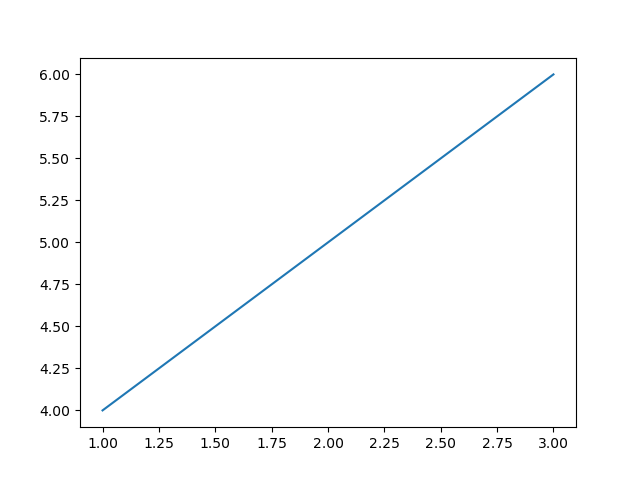

In [10]:
%matplotlib widget
import matplotlib.pyplot as plt
plt.figure()
x = [1,2,3]
y = [4,5,6]
plt.plot(x,y)